This notebook fits a Convolutional Neural Network inorder to detect Hindi characters.

    Let's import the necessary modules:

In [43]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from keras.preprocessing import image
from sklearn.metrics import classification_report

#set up the test, train directories:
train_dir = "datasets/DevanagariHandwrittenCharacterDataset/Train"
test_dir = "datasets/DevanagariHandwrittenCharacterDataset/Test"

Let's try data augmentation:


In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

    Generating the data for testing and training:

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical'
)


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


    Defining the CNN's architecture:

In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(46, activation='softmax')  
])

    Configuring the CNN:
    

In [31]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

    Fit the CNN:

In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 128,  
    epochs=40,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 128
)

Epoch 1/40
610/610 [==============================] - 54s 88ms/step - loss: 2.8559 - accuracy: 0.2402 - val_loss: 1.2506 - val_accuracy: 0.6531
Epoch 2/40
610/610 [==============================] - 54s 88ms/step - loss: 1.8779 - accuracy: 0.4716 - val_loss: 0.8142 - val_accuracy: 0.7625
Epoch 3/40
610/610 [==============================] - 54s 89ms/step - loss: 1.4965 - accuracy: 0.5726 - val_loss: 0.6069 - val_accuracy: 0.8232
Epoch 4/40
610/610 [==============================] - 55s 89ms/step - loss: 1.2724 - accuracy: 0.6302 - val_loss: 0.6084 - val_accuracy: 0.8088
Epoch 5/40
610/610 [==============================] - 55s 89ms/step - loss: 1.1421 - accuracy: 0.6672 - val_loss: 0.5212 - val_accuracy: 0.8403
Epoch 6/40
610/610 [==============================] - 55s 89ms/step - loss: 1.0403 - accuracy: 0.6937 - val_loss: 0.4108 - val_accuracy: 0.8772
Epoch 7/40
610/610 [==============================] - 55s 89ms/step - loss: 0.9572 - accuracy: 0.7177 - val_loss: 0.4031 - val_accuracy:

    Let's look at our model's performance:

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

    Training VS Validation Accuracy:

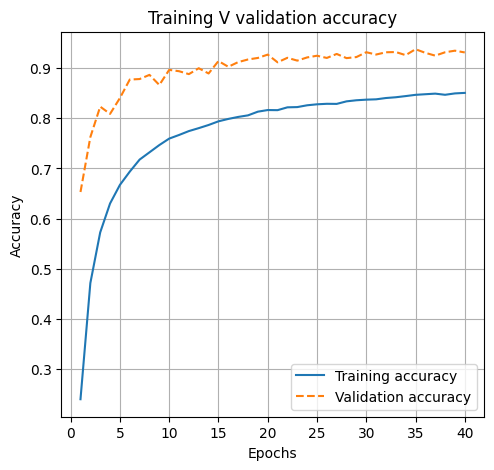

In [34]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, '--', label='Validation accuracy')
plt.title('Training V validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()


    Training vs Validation Losses:

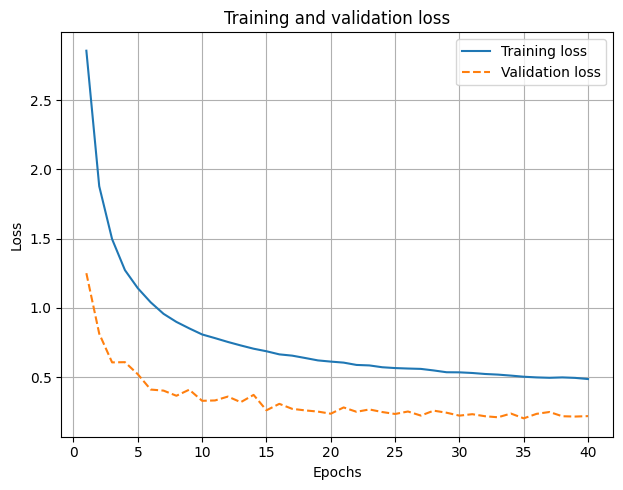

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()